## Import Libraries

In [44]:
import numpy as np
from decimal import Decimal
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Constants, maps, paths...

In [45]:
PATH = '../datasets/'
FILE = 'youtube_statistics_2023.csv'

In [46]:
DTYPE_COLS = {
    'str': [
        'Youtuber', 'category', 'Title', 'Country', 'Abbreviation', 'channel_type', 'created_month', 
    ],
    'int': [
        'rank', 'subscribers', 'uploads', 'video_views_rank', 'country_rank', 
        'channel_type_rank',  
        'subscribers_for_last_30_days', 'created_year', 'created_date',
        'Population','Urban_population', 
    ],
    'float': [
        'Gross tertiary education enrollment (%)', 'Latitude', 'Longitude', 'Unemployment rate','lowest_monthly_earnings',
        'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings',  'video views', 
    ],
    'int64':[
        'video_views_for_the_last_30_days',
    ],
}

In [47]:
# Palette colors
C_DARK = '#161b22'
C_WHITE ='#D1D4C9'
C_BLUE ='#2f81f7'

## Functions

In [48]:
def castDataFrame(df: pd.DataFrame, dtype_cols: dict) -> pd.DataFrame:
    '''
        This function receives a DataFrame with a dict to transform the type of any column.
        Normaly, this dataset must have all columns as string. To transform only int and float.
        
        params:
            df (DataFrame): The original DataFrame with all colums as string.
            dype_cols (dict): The dict with the different types as keys, and the columns as values. 
        
        return:
            This function returns a DataFrame with the transformed columns type.

    '''
    # Drop the type 'str' if it exists.
    types = list(dtype_cols.keys())
    if 'str' in types:
        types.remove('str')

    # Fill null values with np.NaN in order to transform the column to the passed type.
    for t in types:
        df.fillna(np.NaN, inplace = True)
        for col in dtype_cols.get(t):
            try:
                mask = df[col].notnull()
                df.loc[mask, col] = df.loc[mask, col].astype(t)

            except ValueError as error:
                raise ValueError(f'The type "{ t }" not cast in the column "{ col }" for { error }')

            except OverflowError as error:
                raise OverflowError(f'The type "{ t }" not cast in the column "{ col }" for { error }')
        
    return df

In [49]:
def resumeVariables(df: pd.DataFrame, list_cols: list, ascendig: bool = False, n_rows: int = 5) -> pd.DataFrame:
    df = (
    df.loc[:, list_cols]
        .sort_values(list_cols[-1], ascending = ascendig)
        .drop_duplicates()
        .head(n_rows)
    )

    return df

## Load Data

In [50]:
data = pd.read_csv(PATH + FILE, dtype = 'str', sep = ',', decimal = '.', encoding = 'unicode_escape')
data = castDataFrame(data, dtype_cols = DTYPE_COLS)

## Preprocesing

#### Initial Exploration

In [51]:
# Calculate how many null there are in the dataset
total = data.shape[0] * data.shape[1]
nulls = data.isnull().sum().sum()
p_nulls = np.round(nulls / total * 100, 3)

# Print of statistics
print(f'Nulls explorations:')
print(f'There are { nulls }/{ total } with nulls, a { p_nulls } % about total.')
print(f'\nNulls for variables:')

data.isnull().sum().sort_values(ascending = False)

Nulls explorations:
There are 1616/27860 with nulls, a 5.8 % about total.

Nulls for variables:


subscribers_for_last_30_days               337
Longitude                                  123
Latitude                                   123
Urban_population                           123
Unemployment rate                          123
Population                                 123
Gross tertiary education enrollment (%)    123
Country                                    122
Abbreviation                               122
country_rank                               116
video_views_for_the_last_30_days            56
category                                    46
channel_type_rank                           33
channel_type                                30
created_date                                 5
created_month                                5
created_year                                 5
video_views_rank                             1
rank                                         0
highest_yearly_earnings                      0
lowest_yearly_earnings                       0
highest_month

In [52]:
# Calculate how many rows have any null in the dataset
rows_total = data.shape[0]
mask = data.isnull().any(axis=1)
rows_any_nulls = data[mask].isnull().any(axis=1).shape[0]
p_rows_nulls = np.round(rows_any_nulls / rows_total * 100, 3)

print(f'There are { rows_any_nulls }/{ rows_total } of rows have any nulls, a { p_rows_nulls } % about total of rows.')

There are 441/995 of rows have any nulls, a 44.322 % about total of rows.


In [53]:
# Nulls of variable 'Unemployment rate'
mask = data['Unemployment rate'].isnull()
resumeVariables(data[mask], ['Country', 'rank'], n_rows = 10, ascendig = True)

,Country,rank
5,NaN,6
12,NaN,13
14,NaN,15
38,NaN,39
48,NaN,49
51,NaN,52
57,NaN,58
62,NaN,63
74,NaN,75
75,NaN,76


In [54]:
# Nulls of variable Country
mask = data.Country.isnull()
resumeVariables(data[mask], ['Youtuber', 'rank'], n_rows = 10, ascendig = True)

,Youtuber,rank
5,Music,6
12,Gaming,13
14,Goldmines,15
38,LooLoo Kids - Nursery Rhymes and Children's Songs,39
48,Badabun,49
51,Bad Bunny,52
57,BRIGHT SIDE,58
62,HolaSoyGerman.,63
74,elrubiusOMG,75
75,Toys and Colors,76


In [55]:
'''
    No correlation of logical variables has been found for to estimate the null values. 
    So for this example I decided to remove the variable: subscribers for last 30 days
'''
# Pearson correlation method
mask = data.loc[:, ['subscribers', 'subscribers_for_last_30_days']].isnull().any(axis = 1)
df = data[~mask]
corr = df['subscribers'].corr(df['subscribers_for_last_30_days'])
print(f'The correlation of subscribers vs subscribers for last 30 days is: { "{:.2f}".format(corr) }')

mask = data.loc[:, ['video_views_for_the_last_30_days', 'subscribers_for_last_30_days']].isnull().any(axis = 1)
df = data[~mask]
corr = df['video_views_for_the_last_30_days'].corr(df['subscribers_for_last_30_days'])
print(f'The correlation of video views for the last 30 days vs subscribers for last 30 days is: { "{:.2f}".format(corr) }')

The correlation of subscribers vs subscribers for last 30 days is: 0.31
The correlation of video views for the last 30 days vs subscribers for last 30 days is: 0.45


#### Describe

In [56]:
data.describe()

,rank,subscribers,uploads,video_views_rank,country_rank,channel_type_rank,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,9187.125628,5.542489e+05,386.053470,745.719335,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,34151.352254,1.362782e+06,1232.244746,1944.386561,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,194.500000,3.230000e+02,11.000000,27.000000,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,729.000000,9.155000e+02,51.000000,65.500000,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,2667.500000,3.584500e+03,123.000000,139.750000,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,301308.000000,4.057944e+06,7741.000000,7741.000000,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


#### Statistics of qualitative variables

In [57]:
# Statistics Category
df = data.category.value_counts()
np.round(df / rows_total, 3) * 100

category
Entertainment            24.2
Music                    20.3
People & Blogs           13.3
Gaming                    9.4
Comedy                    6.9
Film & Animation          4.6
Education                 4.5
Howto & Style             4.0
News & Politics           2.6
Science & Technology      1.7
Shows                     1.3
Sports                    1.1
Pets & Animals            0.4
Trailers                  0.2
Nonprofits & Activism     0.2
Movies                    0.2
Autos & Vehicles          0.2
Travel & Events           0.1
Name: count, dtype: float64

In [58]:
# Statistics Country
df = data.Country.value_counts()
np.round(df / rows_total, 3) * 100

Country
United States           31.5
India                   16.9
Brazil                   6.2
United Kingdom           4.3
Mexico                   3.3
Indonesia                2.8
Spain                    2.2
Thailand                 1.8
South Korea              1.7
Russia                   1.6
Canada                   1.5
Argentina                1.3
Philippines              1.2
Colombia                 1.1
Australia                0.9
Saudi Arabia             0.9
Ukraine                  0.8
United Arab Emirates     0.7
Germany                  0.6
Pakistan                 0.6
France                   0.5
Japan                    0.5
Turkey                   0.4
Sweden                   0.4
Vietnam                  0.3
Jordan                   0.3
Netherlands              0.3
Singapore                0.3
Chile                    0.3
Egypt                    0.2
Ecuador                  0.2
Iraq                     0.2
Italy                    0.2
China                    0.1
Peru  

In [59]:
# Statistics Channel Type
df = data.channel_type.value_counts()
np.round(df / rows_total, 3) * 100

channel_type
Entertainment    30.6
Music            21.7
People           10.2
Games             9.8
Comedy            5.1
Education         4.9
Film              4.2
Howto             3.6
News              3.0
Tech              1.7
Sports            1.3
Autos             0.3
Animals           0.3
Nonprofit         0.2
Name: count, dtype: float64

#### Outliers

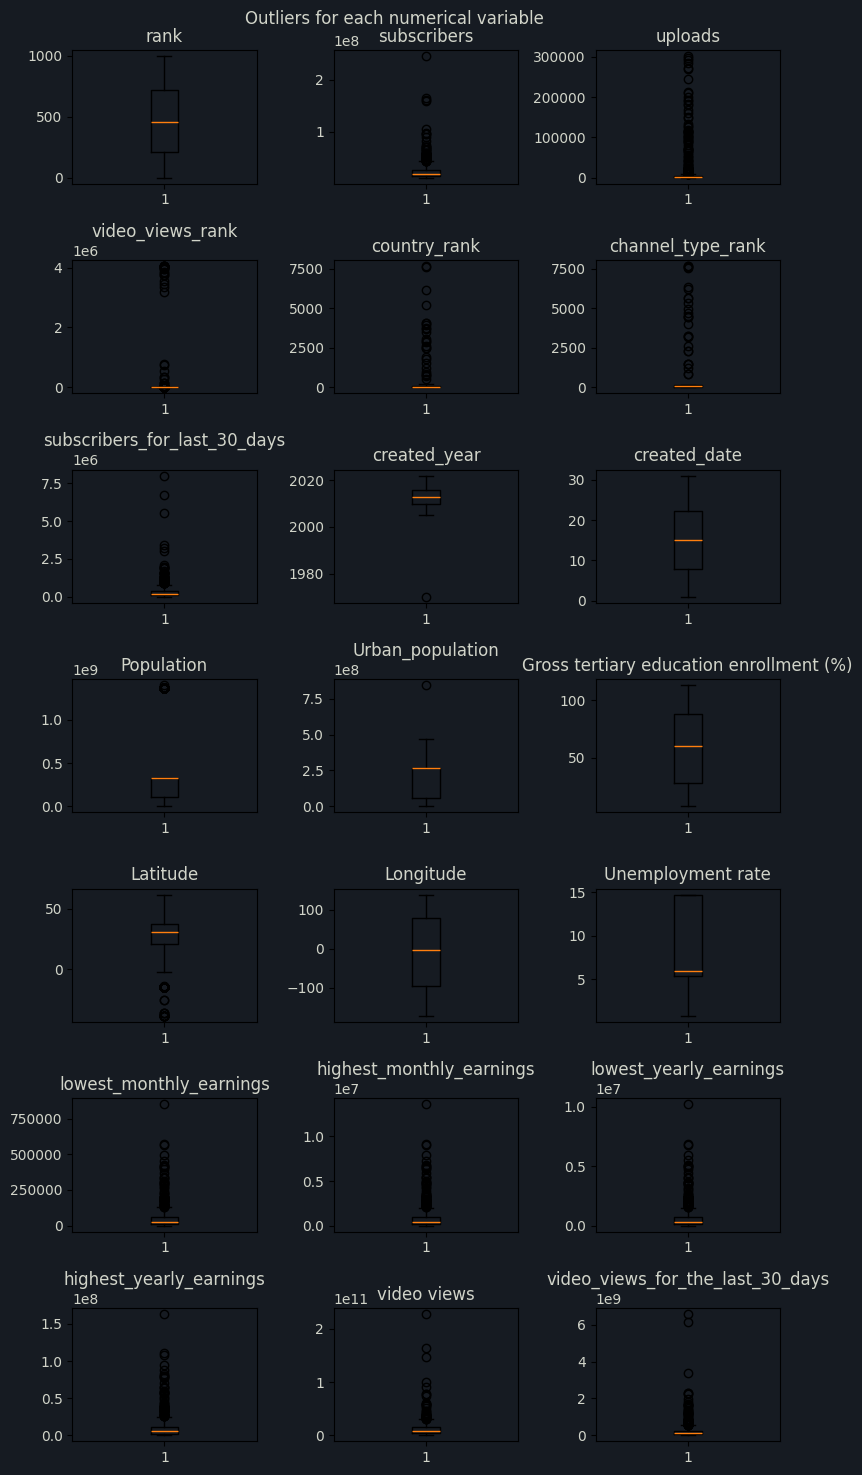

In [60]:
# Drop the columns the type 'str' if it exists.
types = list(DTYPE_COLS.keys())
if 'str' in types:
    DTYPE_COLS.pop('str')

# Create a list of columns with numerics values
list_cols = list(DTYPE_COLS.values())
list_flatten = np.array([elem for col in list_cols for elem in col])
df = data.loc[:, list_flatten]

# Drop the values null
mask = df.isnull().T.any()
df = df[~mask]

# Drop the values null
mask = df.isnull().T.any()
df = df[~mask]

# Create the Graphics
fig, axes = plt.subplots(nrows = 7, ncols = 3, figsize = (8, 15))
fig.set_facecolor(C_DARK)
fig.suptitle('Outliers for each numerical variable', color=C_WHITE)

for i, ax in enumerate(axes.flatten()):
    ax.boxplot(df.iloc[:, i])
    ax.set_title(f'{ df.columns[i] }', color=C_WHITE)

    ax.set_facecolor(C_DARK)
    ax.tick_params(axis='y', labelcolor=C_WHITE)
    ax.tick_params(axis='x', labelcolor=C_WHITE)

fig.tight_layout()
plt.show()

In [61]:
# The outliers of the Subscribers are correct
resumeVariables(data, ['Youtuber', 'subscribers'])

,Youtuber,subscribers
0,T-Series,245000000
1,YouTube Movies,170000000
2,MrBeast,166000000
3,Cocomelon - Nursery Rhymes,162000000
4,SET India,159000000


In [62]:
# The outliers of the Uploads are correct
resumeVariables(data, ['Youtuber', 'uploads'])

,Youtuber,uploads
95,ABP NEWS,301308
857,GMA Integrated News,296272
747,TV9 Bharatvarsh,293516
33,Aaj Tak,283775
107,IndiaTV,273255


In [63]:
# The outliers of the video_views_rank are weird
resumeVariables(data, ['Youtuber', 'rank', 'video views', 'video_views_rank'], n_rows = 20)

,Youtuber,rank,video views,video_views_rank
606,ýýýýýýýýýý,607,1845329502.0,4057944.0
853,Blockbuster Movies,854,2650061211.0,4057944.0
394,Robin Hood Gamer,395,10366850490.0,4057944.0
166,Frost Diamond,167,7277493940.0,4057944.0
440,Masha e o Urso,441,8301731337.0,4057944.0
463,Dhar Mann,464,11280732382.0,4057944.0
476,Ajay Sharma,477,12249828886.0,4057944.0
544,Doggy Doggy Cartoons,545,6518418501.0,4057944.0
554,Werever2morro,555,2798273962.0,4057944.0
592,Live,593,0.0,4057944.0


In [64]:
# The outliers of the country_rank are weird
resumeVariables(data, ['Youtuber', 'rank', 'country_rank'])

,Youtuber,rank,country_rank
411,Official Pink Panther,412,7741.0
164,Talking Tom,165,7736.0
414,AS Gaming,415,7711.0
299,Alan Becker,300,7700.0
680,TheRichest,681,7692.0


In [65]:
# The outliers of the channel_type_rank are weird
resumeVariables(data, ['Youtuber', 'rank', 'channel_type_rank'])

,Youtuber,rank,channel_type_rank
985,TKOR,986,7741.0
492,Zuni and Family,493,7733.0
534,Gaby and Alex,535,7732.0
450,Ali-A,451,7729.0
348,Khan GS Research Centre,349,7727.0


In [66]:
# The outliers of the Population are correct
resumeVariables(data, ['Country', 'Population'])

,Country,Population
507,China,1.397715e+09
0,India,1.366418e+09
640,United States,3.282395e+08
351,Indonesia,2.702039e+08
818,Pakistan,2.165653e+08


In [67]:
# The outliers of the created_year are correct less for the one for Youtube
resumeVariables(data, ['Youtuber', 'rank', 'created_year'], ascendig = True)

,Youtuber,rank,created_year
101,YouTube,102,1970.0
682,PlayStation,683,2005.0
671,BIGBANG,672,2005.0
70,Ishtar Music,71,2005.0
69,Rihanna,70,2005.0


In [68]:
# The outliers of the urban_population are weird, these are supposed to be percentages of the population living in cities
resumeVariables(data, ['Country', 'Urban_population'])

,Country,Urban_population
507,China,842933962.0
0,India,471031528.0
640,United States,270663028.0
892,Brazil,183241641.0
645,Indonesia,151509724.0


In [69]:
# The outliers of the Gross tertiary education enrollment can to be correct less for the one for Australia. Isn't posibble exceed to 100%
resumeVariables(data, ['Country', 'Gross tertiary education enrollment (%)'])

,Country,Gross tertiary education enrollment (%)
247,Australia,113.1
495,South Korea,94.3
527,Argentina,90.0
796,Spain,88.9
44,Chile,88.5


In [70]:
# The outliers of the video views are correct
df = resumeVariables(data, ['Youtuber', 'video views'])
df['video views'] = df['video views'].apply(lambda n: '{:,.0f}'.format(n))
df

,Youtuber,video views
0,T-Series,"228,000,000,000"
3,Cocomelon - Nursery Rhymes,"164,000,000,000"
4,SET India,"148,000,000,000"
15,Sony SAB,"101,000,000,000"
6,ýýý Kids Diana Show,"93,247,040,539"


In [71]:
# The outliers of the Unemployment rate can to be correct
resumeVariables(data, ['Country', 'Unemployment rate'])

,Country,Unemployment rate
300,Jordan,14.72
323,United States,14.70
482,Spain,13.96
259,Turkey,13.49
923,Iraq,12.82


### Handling of nulls and outliers

In [72]:
# Changed the Gross tertiary education enrollment rate
mask = data.Country == 'Australia'
data.loc[mask, 'Gross tertiary education enrollment (%)'] = 100.

In [73]:
# Changed the year YouTube was created
mask = data.Youtuber == 'YouTube'
data.loc[mask, 'created_year'] = 2005

In [74]:
# Category nulls filled with value 'unkown'
data.category.fillna('Unkown', inplace = True)

In [75]:
# Drop the variable subscribers_for_last_30_days
data.drop('subscribers_for_last_30_days', axis = 1, inplace = True)

In [76]:
# Find and update the unemployment rate of Andorra
mask = data['Country'] == 'Andorra'
data.loc[mask, 'Unemployment rate'] = 2.1

In [77]:
'''
    The rest of the nulls are caused by ignorance of the country. They will be deleted when the data will be processed. For the rest of the analysis 
    the data are perfectly valid. So they will not be removed from the dataset. 
    
    For this example, it makes no sense to estimate such data and reach possible erroneous conclusions.
''';

## Data analysis

Density of youtubers by category and their number of subscribers

In [78]:
df = (
    data.loc[:, ['subscribers', 'category']]
    .groupby('category')
    .sum()
    .reset_index()
    .sort_values('subscribers', ascending = False)
    )
top_5 = df.category[:5]
botton_5 = df.category[-5:]

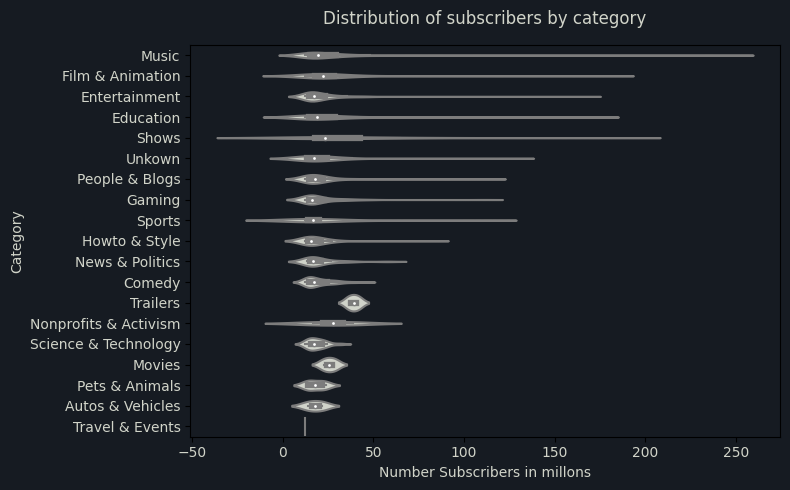

In [79]:
# Distribution of subscribers by category
df = data.copy(deep=True)
df.subscribers = df.subscribers / 1000000

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

fig.set_facecolor(C_DARK)
axes.set_facecolor(C_DARK)
axes.set_title('Distribution of subscribers by category', pad=15, color=C_WHITE)
axes.tick_params(axis='y', labelcolor=C_WHITE)
axes.tick_params(axis='x', labelcolor=C_WHITE)

sns.violinplot(data = df, x = 'subscribers', y = 'category', color=C_WHITE)

axes.set_ylabel('Category', color=C_WHITE)
axes.set_xlabel('Number Subscribers in millons', color=C_WHITE)

fig.tight_layout()
plt.show()

In [80]:
(data
    .loc[:, ['Youtuber', 'category']]
    .groupby('category')
    .count()
    .reset_index()
    .sort_values('Youtuber', ascending=False)
)

,category,Youtuber
3,Entertainment,241
8,Music,202
11,People & Blogs,132
5,Gaming,94
1,Comedy,69
18,Unkown,46
4,Film & Animation,46
2,Education,45
6,Howto & Style,40
9,News & Politics,26


Earnings by category

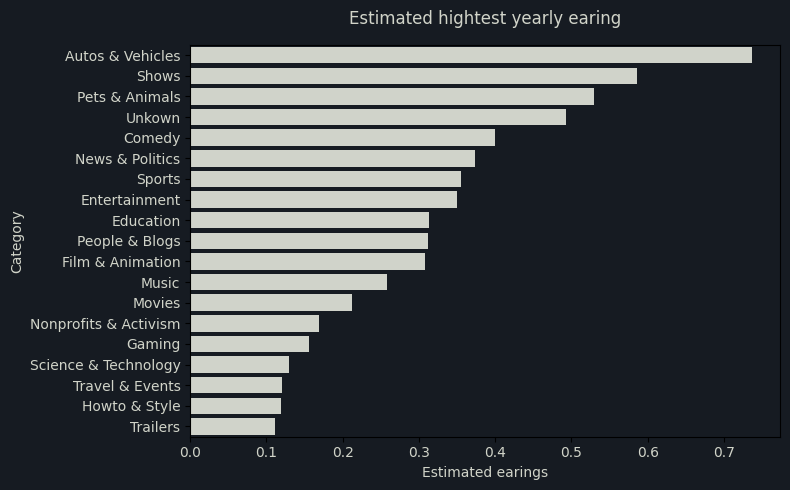

In [81]:
# Earings by Category
cols = ['category', 'subscribers', 'highest_yearly_earnings']
df = (data
            .loc[:, cols]
            .groupby('category')
            .sum()
            .reset_index()
        )
df['earings_by_subscriber'] = df.highest_yearly_earnings / df.subscribers
df = df.sort_values('earings_by_subscriber', ascending=False)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

fig.set_facecolor(C_DARK)
axes.set_facecolor(C_DARK)
axes.set_title('Estimated hightest yearly earing', pad=15, color=C_WHITE)
axes.tick_params(axis='y', labelcolor=C_WHITE)
axes.tick_params(axis='x', labelcolor=C_WHITE)

sns.barplot(data = df, x = 'earings_by_subscriber', y = 'category', color=C_WHITE)

axes.set_ylabel('Category', color=C_WHITE)
axes.set_xlabel('Estimated earings', color=C_WHITE)

fig.tight_layout()
plt.show()

In [82]:
# Calculate variables
cols = ['category', 'subscribers', 'highest_yearly_earnings', 'lowest_yearly_earnings']
df = (data
            .loc[:, cols]
            .groupby('category')
            .sum()
        )
df['hightest_earings_by_subscriber'] = df.highest_yearly_earnings / df.subscribers
df['lowest_earings_by_subscriber'] = df.lowest_yearly_earnings / df.subscribers
df['hightest_earings_by_subscriber'] = df['hightest_earings_by_subscriber'].astype(float)
df['lowest_earings_by_subscriber'] = df['lowest_earings_by_subscriber'].astype(float)
df = df.sort_values('hightest_earings_by_subscriber', ascending=False)

df_earings_per_sub = pd.concat([df.hightest_earings_by_subscriber, df.lowest_earings_by_subscriber], axis=0).reset_index(name='earings')
df = df.reset_index()

Estimated range of benefits by category

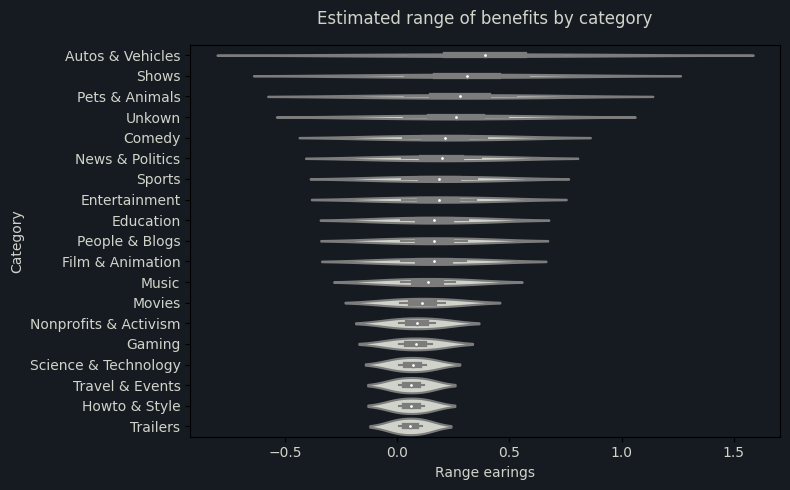

In [83]:
# Estimated range of benefits by category
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

fig.set_facecolor(C_DARK)
axes.set_facecolor(C_DARK)
axes.set_title('Estimated range of benefits by category', pad=15, color=C_WHITE)
axes.tick_params(axis='y', labelcolor=C_WHITE)
axes.tick_params(axis='x', labelcolor=C_WHITE)

sns.violinplot(data=df_earings_per_sub, x='earings', y='category', color=C_WHITE)

axes.set_ylabel('Category', color=C_WHITE)
axes.set_xlabel('Range earings', color=C_WHITE)

fig.tight_layout()
plt.show()

Comparison of estimated earnings per subscriber vs per year

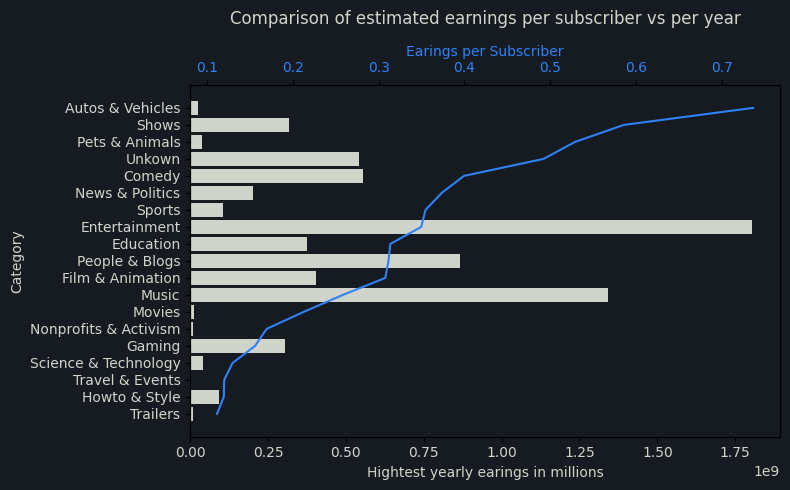

In [84]:
# Comparison of estimated earnings per subscriber vs per year
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

fig.set_facecolor(C_DARK)
ax1.set_facecolor(C_DARK)
ax1.set_title('Comparison of estimated earnings per subscriber vs per year', pad=15, color=C_WHITE)
ax1.tick_params(axis='y', labelcolor=C_WHITE)
ax1.tick_params(axis='x', labelcolor=C_WHITE)

sns.barplot(data=df, x='highest_yearly_earnings', y='category', color=C_WHITE)

ax1.set_ylabel('Category', color=C_WHITE)
ax1.set_xlabel('Hightest yearly earings in millions', color=C_WHITE)

ax2 = ax1.twiny()
ax2.tick_params(axis='x', labelcolor=C_BLUE)

sns.lineplot(data=df, x='hightest_earings_by_subscriber', y='category', color=C_BLUE)

ax2.set_xlabel('Earings per Subscriber', color=C_BLUE)

fig.tight_layout()
plt.show()

Comparison of estimated earnings per subs vs number subs

In [85]:
df

,category,subscribers,highest_yearly_earnings,lowest_yearly_earnings,hightest_earings_by_subscriber,lowest_earings_by_subscriber
0,Autos & Vehicles,35700000,26300000.0,1679500.0,0.736695,0.047045
1,Shows,541000000,317000000.0,19839900.0,0.585952,0.036673
2,Pets & Animals,72400000,38300346.0,2433222.0,0.529010,0.033608
3,Unkown,1103900000,543398628.82,33963103.05,0.492253,0.030766
4,Comedy,1388500000,554665000.0,34566682.0,0.399471,0.024895
5,News & Politics,536400000,200401569.05,12575698.0,0.373605,0.023445
6,Sports,298200000,105766300.0,6632200.0,0.354682,0.022241
7,Entertainment,5158200000,1803634875.55,112513997.36,0.349664,0.021813
8,Education,1194400000,374597601.0,23376900.08,0.313628,0.019572
9,People & Blogs,2779400000,865770301.94,54175766.13,0.311495,0.019492


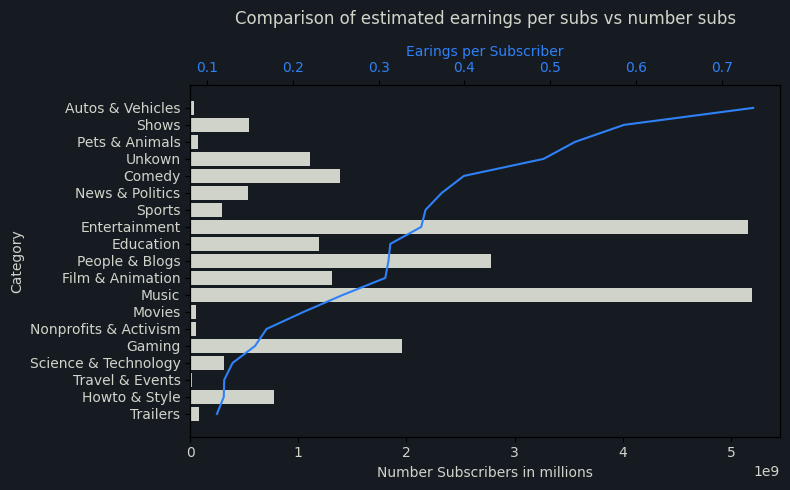

In [86]:
# Comparison of estimated earnings per subs vs number subs
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

fig.set_facecolor(C_DARK)
ax1.set_facecolor(C_DARK)
ax1.set_title('Comparison of estimated earnings per subs vs number subs', pad=15, color=C_WHITE)
ax1.tick_params(axis='y', labelcolor=C_WHITE)
ax1.tick_params(axis='x', labelcolor=C_WHITE)

sns.barplot(data=df, x='subscribers', y='category', color=C_WHITE)

ax1.set_ylabel('Category', color=C_WHITE)
ax1.set_xlabel('Number Subscribers in millions', color=C_WHITE)

ax2 = ax1.twiny()
ax2.tick_params(axis='x', labelcolor=C_BLUE)

sns.lineplot(data=df, x='hightest_earings_by_subscriber', y='category', color=C_BLUE)

ax2.set_xlabel('Earings per Subscriber', color=C_BLUE)

fig.tight_layout()
plt.show()